In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# For displaying all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


✅ All libraries imported successfully!
Pandas version: 2.1.4
NumPy version: 1.26.2


In [2]:
print("📂 Loading dataset... (this may take a few minutes)")

df = pd.read_csv('data/flights_sample_3m.csv', nrows=500000)  

print(f"\n✅ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📂 Loading dataset... (this may take a few minutes)

✅ Dataset loaded successfully!
Shape: 500,000 rows × 32 columns
Memory usage: 362.44 MB


In [3]:
print("=" * 80)
print("INITIAL DATA EXPLORATION")
print("=" * 80)

# Display first few rows
print("\n📊 First 5 rows:")
display(df.head())

# Column names and types
print("\n📋 Column Information:")
display(df.info())

# Basic statistics
print("\n📈 Statistical Summary:")
display(df.describe())

INITIAL DATA EXPLORATION

📊 First 5 rows:


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN



📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  500000 non-null  object 
 1   AIRLINE                  500000 non-null  object 
 2   AIRLINE_DOT              500000 non-null  object 
 3   AIRLINE_CODE             500000 non-null  object 
 4   DOT_CODE                 500000 non-null  int64  
 5   FL_NUMBER                500000 non-null  int64  
 6   ORIGIN                   500000 non-null  object 
 7   ORIGIN_CITY              500000 non-null  object 
 8   DEST                     500000 non-null  object 
 9   DEST_CITY                500000 non-null  object 
 10  CRS_DEP_TIME             500000 non-null  int64  
 11  DEP_TIME                 487056 non-null  float64
 12  DEP_DELAY                487051 non-null  float64
 13  TAXI_OUT                 486862 non-

None


📈 Statistical Summary:


,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,500000.000000,500000.000000,500000.000000,487056.000000,487051.000000,486862.000000,486862.000000,486680.000000,486680.000000,500000.000000,486680.000000,485652.000000,500000.000000,500000.000000,499996.000000,485652.000000,485652.000000,500000.000000,89232.000000,89232.000000,89232.000000,89232.000000,89232.000000
mean,19977.089464,2509.142590,1327.153168,1330.197382,10.150808,16.642778,1352.717604,1463.274147,7.677363,1491.259396,1467.307720,4.279801,0.026390,0.002306,142.207562,136.565405,112.258938,808.763890,24.588858,3.869946,13.214351,0.150641,25.553613
std,377.056453,1744.904379,485.721885,499.169610,49.113391,9.209484,500.752110,526.848409,6.246828,511.091770,531.417399,51.052173,0.160292,0.047965,71.430430,71.560149,69.644297,586.757193,70.931907,32.405801,33.483004,3.564969,55.991135
min,19393.000000,1.000000,1.000000,1.000000,-68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-84.000000,0.000000,0.000000,20.000000,16.000000,8.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19790.000000,1051.000000,915.000000,916.000000,-6.000000,11.000000,931.000000,1050.000000,4.000000,1108.000000,1053.000000,-16.000000,0.000000,0.000000,90.000000,84.000000,61.000000,377.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19930.000000,2150.000000,1320.000000,1323.000000,-2.000000,14.000000,1336.000000,1502.000000,6.000000,1517.000000,1505.000000,-7.000000,0.000000,0.000000,125.000000,120.000000,95.000000,651.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,20368.000000,3790.000000,1730.000000,1739.000000,6.000000,19.000000,1752.000000,1909.000000,9.000000,1919.000000,1914.000000,7.000000,0.000000,0.000000,172.000000,167.000000,142.000000,1045.000000,23.000000,0.000000,17.000000,0.000000,30.000000
max,20452.000000,8815.000000,2359.000000,2400.000000,2565.000000,184.000000,2400.000000,2400.000000,240.000000,2400.000000,2400.000000,2556.000000,1.000000,1.000000,685.000000,722.000000,661.000000,5095.000000,2556.000000,1398.000000,1468.000000,291.000000,2010.000000


In [5]:
print(df.shape)



(500000, 32)


In [4]:
print("\n📝 All Column Names:")
print(df.columns.tolist())

# Save column names for reference
columns = df.columns.tolist()


📝 All Column Names:
['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']


MISSING DATA ANALYSIS

 Columns with Missing Values:


,Column,Missing_Count,Missing_Percentage
CANCELLATION_CODE,CANCELLATION_CODE,486805,97.3610
DELAY_DUE_CARRIER,DELAY_DUE_CARRIER,410768,82.1536
DELAY_DUE_SECURITY,DELAY_DUE_SECURITY,410768,82.1536
DELAY_DUE_NAS,DELAY_DUE_NAS,410768,82.1536
DELAY_DUE_WEATHER,DELAY_DUE_WEATHER,410768,82.1536
DELAY_DUE_LATE_AIRCRAFT,DELAY_DUE_LATE_AIRCRAFT,410768,82.1536
ARR_DELAY,ARR_DELAY,14348,2.8696
ELAPSED_TIME,ELAPSED_TIME,14348,2.8696
AIR_TIME,AIR_TIME,14348,2.8696
ARR_TIME,ARR_TIME,13320,2.6640


<Figure size 1500x800 with 0 Axes>

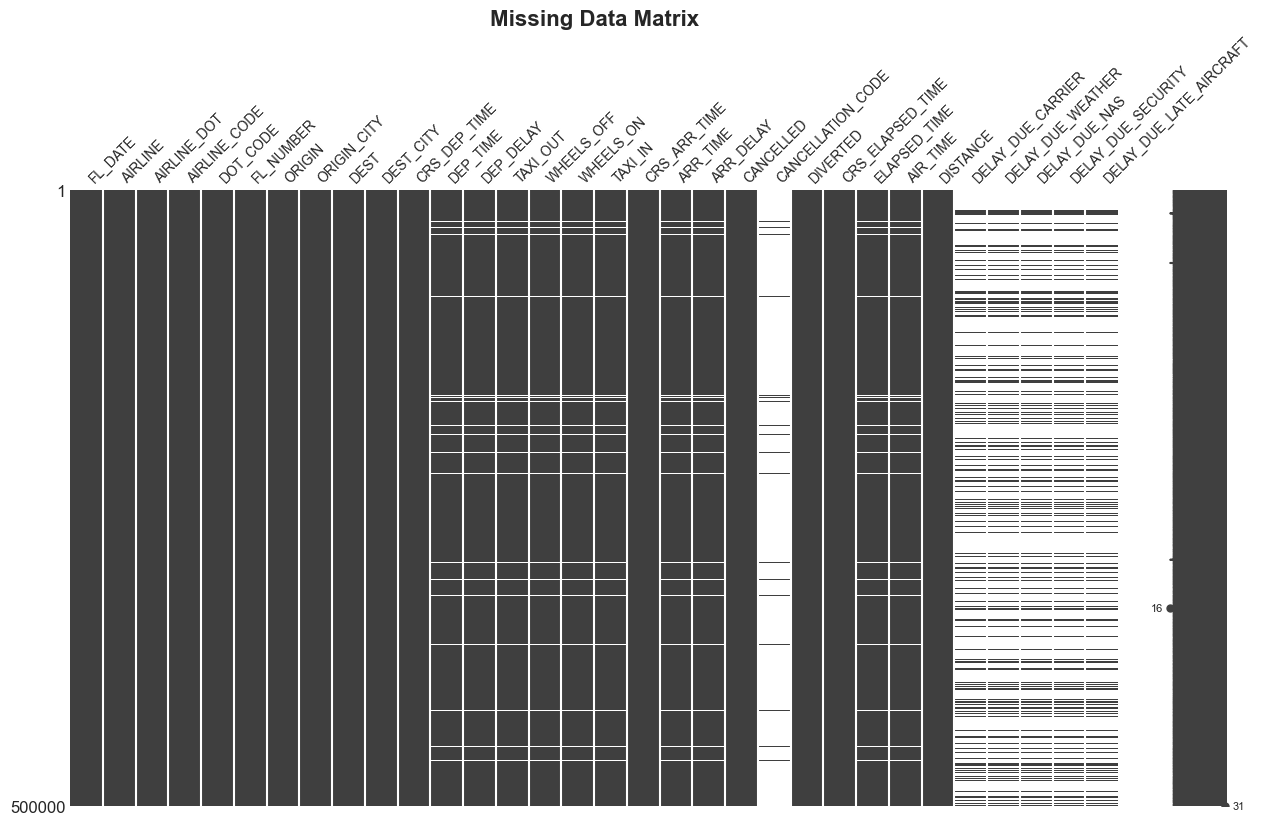

 Saved: viz_01_missing_data_matrix.png


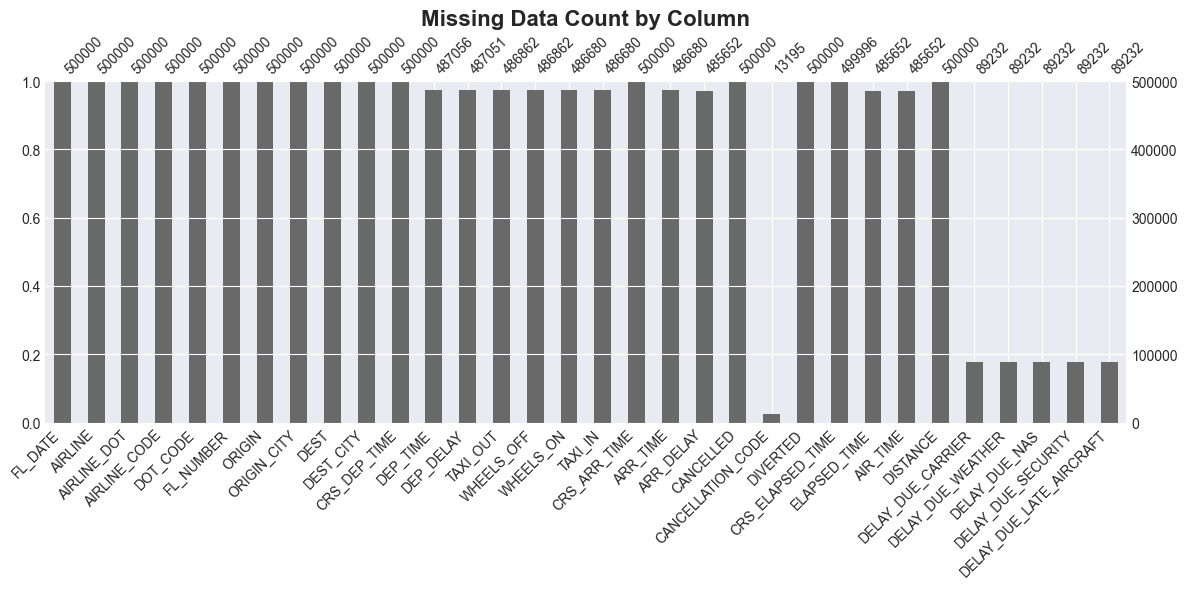

 Saved: viz_02_missing_data_bar.png


In [5]:

print("MISSING DATA ANALYSIS")


# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("\n Columns with Missing Values:")
display(missing_data)

# Visualization 1: Missing Data Matrix
plt.figure(figsize=(15, 8))
msno.matrix(df, figsize=(15, 8), fontsize=10)
plt.title('Missing Data Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('viz_01_missing_data_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: viz_01_missing_data_matrix.png")

# Visualization 2: Missing Data Bar Chart
plt.figure(figsize=(12, 6))
msno.bar(df, figsize=(12, 6), fontsize=10)
plt.title('Missing Data Count by Column', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('viz_02_missing_data_bar.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: viz_02_missing_data_bar.png")

In [7]:
print("\n Understanding Missing Data Patterns:")

# Check if delay causes are missing when flight is on-time
delay_columns = [col for col in df.columns if 'DELAY' in col.upper()]
print(f"\nDelay-related columns: {delay_columns}")

# Check cancellation patterns
if 'CANCELLED' in df.columns:
    cancelled_rate = df['CANCELLED'].mean() * 100
    print(f"\n  Cancellation Rate: {cancelled_rate:.2f}%")
    print(f"Cancelled flights: {df['CANCELLED'].sum():,}")


 Understanding Missing Data Patterns:

Delay-related columns: ['DEP_DELAY', 'ARR_DELAY', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']

  Cancellation Rate: 2.64%
Cancelled flights: 13,195.0


In [8]:

print("DATA PREPROCESSING")


# Create a copy for preprocessing
df_processed = df.copy()

# Strategy for missing values:
# 1. Delay causes: Fill with 0 (means no delay of that type)
# 2. Cancellation reasons: Keep as is (will create separate flag)
# 3. Other numerical: Fill with median or create "Unknown" category

# Fill delay causes with 0 (on-time flights don't have delay breakdown)
delay_cause_cols = [col for col in df_processed.columns if 'DELAY' in col.upper() and col.upper() != 'DEP_DELAY' and col.upper() != 'ARR_DELAY']
for col in delay_cause_cols:
    if col in df_processed.columns:
        df_processed[col].fillna(0, inplace=True)
        print(f"Filled {col} with 0")

print(f"\nMissing values after preprocessing:")
print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])

DATA PREPROCESSING
Filled DELAY_DUE_CARRIER with 0
Filled DELAY_DUE_WEATHER with 0
Filled DELAY_DUE_NAS with 0
Filled DELAY_DUE_SECURITY with 0
Filled DELAY_DUE_LATE_AIRCRAFT with 0

Missing values after preprocessing:
DEP_TIME              12944
DEP_DELAY             12949
TAXI_OUT              13138
WHEELS_OFF            13138
WHEELS_ON             13320
TAXI_IN               13320
ARR_TIME              13320
ARR_DELAY             14348
CANCELLATION_CODE    486805
CRS_ELAPSED_TIME          4
ELAPSED_TIME          14348
AIR_TIME              14348
dtype: int64


In [9]:

print("FEATURE ENGINEERING")


# Convert date column to datetime (adjust column name as needed)
date_col = 'FL_DATE' if 'FL_DATE' in df_processed.columns else 'DATE'
if date_col in df_processed.columns:
    df_processed[date_col] = pd.to_datetime(df_processed[date_col])
    
    # Extract time features
    df_processed['YEAR'] = df_processed[date_col].dt.year
    df_processed['MONTH'] = df_processed[date_col].dt.month
    df_processed['DAY'] = df_processed[date_col].dt.day
    df_processed['DAY_OF_WEEK'] = df_processed[date_col].dt.dayofweek
    df_processed['QUARTER'] = df_processed[date_col].dt.quarter
    
    print("Created time features: YEAR, MONTH, DAY, DAY_OF_WEEK, QUARTER")

# Create hour from departure time
if 'CRS_DEP_TIME' in df_processed.columns:
    df_processed['DEP_HOUR'] = (df_processed['CRS_DEP_TIME'] // 100).astype(int)
    print("Created DEP_HOUR from CRS_DEP_TIME")

# Create categorical time features
df_processed['IS_WEEKEND'] = df_processed['DAY_OF_WEEK'].isin([5, 6]).astype(int)
df_processed['SEASON'] = df_processed['MONTH'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

print("Created IS_WEEKEND and SEASON features")

# Time of day categories
if 'DEP_HOUR' in df_processed.columns:
    df_processed['TIME_OF_DAY'] = pd.cut(df_processed['DEP_HOUR'], 
                                          bins=[0, 6, 12, 18, 24],
                                          labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                          include_lowest=True)
    print(" Created TIME_OF_DAY feature")

FEATURE ENGINEERING
Created time features: YEAR, MONTH, DAY, DAY_OF_WEEK, QUARTER
Created DEP_HOUR from CRS_DEP_TIME
Created IS_WEEKEND and SEASON features
 Created TIME_OF_DAY feature


In [10]:
# Distance categories
if 'DISTANCE' in df_processed.columns:
    df_processed['DISTANCE_CATEGORY'] = pd.cut(df_processed['DISTANCE'],
                                                bins=[0, 500, 1000, 2000, 5000],
                                                labels=['Short', 'Medium', 'Long', 'Very_Long'])
    print("Created DISTANCE_CATEGORY")

# Route frequency (how popular is this route)
if 'ORIGIN' in df_processed.columns and 'DEST' in df_processed.columns:
    route_counts = df_processed.groupby(['ORIGIN', 'DEST']).size()
    df_processed['ROUTE_FREQUENCY'] = df_processed.apply(
        lambda x: route_counts.get((x['ORIGIN'], x['DEST']), 0), axis=1
    )
    print("Created ROUTE_FREQUENCY")

# Airport daily traffic
if 'ORIGIN' in df_processed.columns:
    origin_traffic = df_processed.groupby(['ORIGIN', date_col]).size()
    df_processed['ORIGIN_DAILY_FLIGHTS'] = df_processed.apply(
        lambda x: origin_traffic.get((x['ORIGIN'], x[date_col]), 0), axis=1
    )
    print("Created ORIGIN_DAILY_FLIGHTS")

Created DISTANCE_CATEGORY
Created ROUTE_FREQUENCY
Created ORIGIN_DAILY_FLIGHTS


In [11]:

print("TARGET VARIABLE CREATION")


# Define "delayed" as arrival delay > 15 minutes (industry standard)
if 'ARR_DELAY' in df_processed.columns:
    df_processed['IS_DELAYED'] = (df_processed['ARR_DELAY'] > 15).astype(int)
    
    delay_rate = df_processed['IS_DELAYED'].mean() * 100
    print(f"\nOverall Delay Rate: {delay_rate:.2f}%")
    print(f"Delayed flights: {df_processed['IS_DELAYED'].sum():,}")
    print(f"On-time flights: {(df_processed['IS_DELAYED'] == 0).sum():,}")
    
    # Check class balance
    print("\nTarget Variable Distribution:")
    print(df_processed['IS_DELAYED'].value_counts())
else:
    print("ARR_DELAY column not found. Adjust column name.")

print("\nFeature engineering completed!")
print(f"New shape: {df_processed.shape[0]:,} rows × {df_processed.shape[1]} columns")

# Save processed data
df_processed.to_csv('data/flights_processed.csv', index=False)
print("\n Saved processed data to: flights_processed.csv")

TARGET VARIABLE CREATION

Overall Delay Rate: 17.24%
Delayed flights: 86,225
On-time flights: 413,775

Target Variable Distribution:
IS_DELAYED
0    413775
1     86225
Name: count, dtype: int64

Feature engineering completed!
New shape: 500,000 rows × 45 columns

 Saved processed data to: flights_processed.csv


In [13]:

print("CREATED FEATURES SUMMARY")


new_features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'QUARTER', 'DEP_HOUR',
                'IS_WEEKEND', 'SEASON', 'TIME_OF_DAY', 'DISTANCE_CATEGORY',
                'ROUTE_FREQUENCY', 'ORIGIN_DAILY_FLIGHTS', 'IS_DELAYED']

existing_features = [f for f in new_features if f in df_processed.columns]
print(f"\ Successfully created {len(existing_features)} new features:")
for feature in existing_features:
    print(f"   - {feature}")

CREATED FEATURES SUMMARY
\ Successfully created 13 new features:
   - YEAR
   - MONTH
   - DAY
   - DAY_OF_WEEK
   - QUARTER
   - DEP_HOUR
   - IS_WEEKEND
   - SEASON
   - TIME_OF_DAY
   - DISTANCE_CATEGORY
   - ROUTE_FREQUENCY
   - ORIGIN_DAILY_FLIGHTS
   - IS_DELAYED


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the processed data
df = pd.read_csv('data/flights_processed.csv')
print(f" Loaded processed data: {df.shape[0]:,} rows × {df.shape[1]} columns")

 Loaded processed data: 500,000 rows × 45 columns


In [15]:

print("DESCRIPTIVE ANALYTICS - SUMMARY STATISTICS")


# Key metrics
if 'ARR_DELAY' in df.columns:
    print("\nDELAY STATISTICS:")
    print(f"Average arrival delay: {df['ARR_DELAY'].mean():.2f} minutes")
    print(f"Median arrival delay: {df['ARR_DELAY'].median():.2f} minutes")
    print(f"Maximum delay: {df['ARR_DELAY'].max():.0f} minutes")
    print(f"Standard deviation: {df['ARR_DELAY'].std():.2f} minutes")

if 'IS_DELAYED' in df.columns:
    print(f"\n DELAY RATE:")
    print(f"Percentage of delayed flights (>15 min): {df['IS_DELAYED'].mean()*100:.2f}%")

if 'CANCELLED' in df.columns:
    print(f"\n CANCELLATION RATE:")
    print(f"Percentage of cancelled flights: {df['CANCELLED'].mean()*100:.2f}%")

if 'DISTANCE' in df.columns:
    print(f"\n FLIGHT DISTANCE:")
    print(f"Average distance: {df['DISTANCE'].mean():.0f} miles")
    print(f"Total distance covered: {df['DISTANCE'].sum():,.0f} miles")

DESCRIPTIVE ANALYTICS - SUMMARY STATISTICS

DELAY STATISTICS:
Average arrival delay: 4.28 minutes
Median arrival delay: -7.00 minutes
Maximum delay: 2556 minutes
Standard deviation: 51.05 minutes

 DELAY RATE:
Percentage of delayed flights (>15 min): 17.24%

 CANCELLATION RATE:
Percentage of cancelled flights: 2.64%

 FLIGHT DISTANCE:
Average distance: 809 miles
Total distance covered: 404,381,945 miles


In [16]:
print("\n Creating Visualization 3: Daily Delay Trends...")

if 'FL_DATE' in df.columns and 'ARR_DELAY' in df.columns:
    df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
    
    # Calculate daily average delay
    daily_delays = df.groupby('FL_DATE').agg({
        'ARR_DELAY': 'mean',
        'IS_DELAYED': 'mean'
    }).reset_index()
    
    # Create figure
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=('Average Arrival Delay Over Time', 'Delay Rate Over Time'),
        vertical_spacing=0.12
    )
    
    # Plot 1: Average delay
    fig.add_trace(
        go.Scatter(x=daily_delays['FL_DATE'], y=daily_delays['ARR_DELAY'],
                   mode='lines', name='Avg Delay (min)',
                   line=dict(color='red', width=1)),
        row=1, col=1
    )
    
    # Plot 2: Delay rate
    fig.add_trace(
        go.Scatter(x=daily_delays['FL_DATE'], y=daily_delays['IS_DELAYED']*100,
                   mode='lines', name='Delay Rate (%)',
                   line=dict(color='orange', width=1)),
        row=2, col=1
    )
    
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Minutes", row=1, col=1)
    fig.update_yaxes(title_text="Percentage", row=2, col=1)
    
    fig.update_layout(height=700, title_text="Flight Delay Trends (2019-2023)",
                      showlegend=True)
    
    fig.write_html('viz_03_delay_trends.html')
    fig.show()
    print(" Saved: viz_03_delay_trends.html")



 Creating Visualization 3: Daily Delay Trends...


 Saved: viz_03_delay_trends.html



 Creating Visualization 4: Delay Distribution...


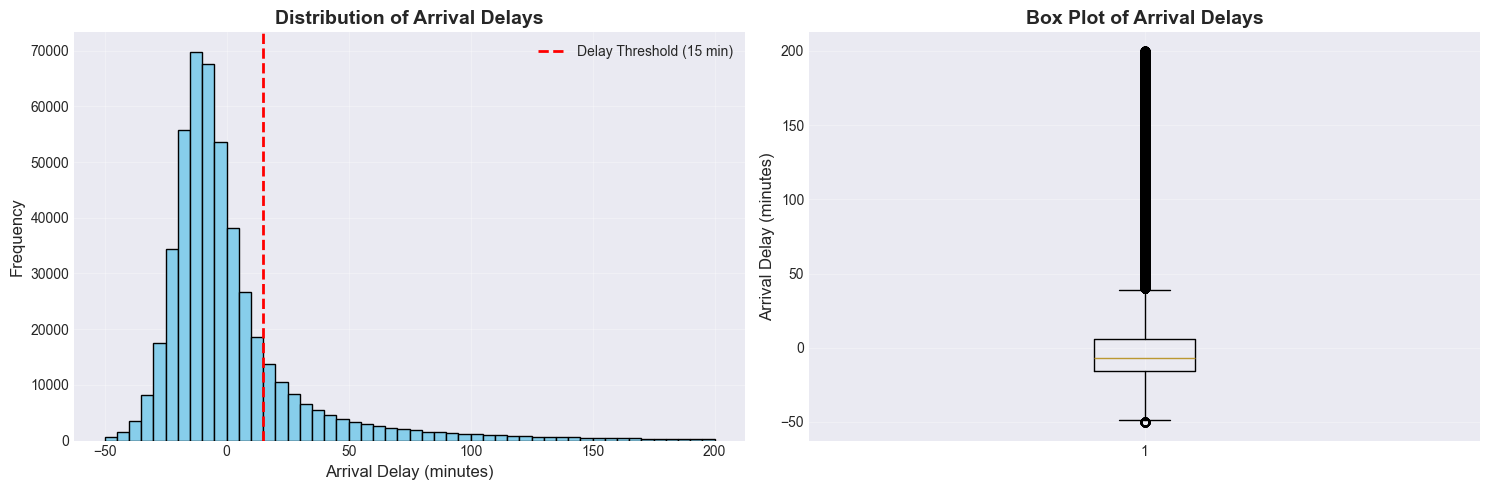

 Saved: viz_04_delay_distribution.png


In [17]:
print("\n Creating Visualization 4: Delay Distribution...")

if 'ARR_DELAY' in df.columns:
    # Filter out extreme outliers for better visualization
    delay_filtered = df[df['ARR_DELAY'].between(-50, 200)]
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(delay_filtered['ARR_DELAY'], bins=50, color='skyblue', edgecolor='black')
    axes[0].axvline(x=15, color='red', linestyle='--', linewidth=2, label='Delay Threshold (15 min)')
    axes[0].set_xlabel('Arrival Delay (minutes)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Arrival Delays', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Box plot
    axes[1].boxplot(delay_filtered['ARR_DELAY'], vert=True)
    axes[1].set_ylabel('Arrival Delay (minutes)', fontsize=12)
    axes[1].set_title('Box Plot of Arrival Delays', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('viz_04_delay_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: viz_04_delay_distribution.png")


 Creating Visualization 5: Delay Heatmap...


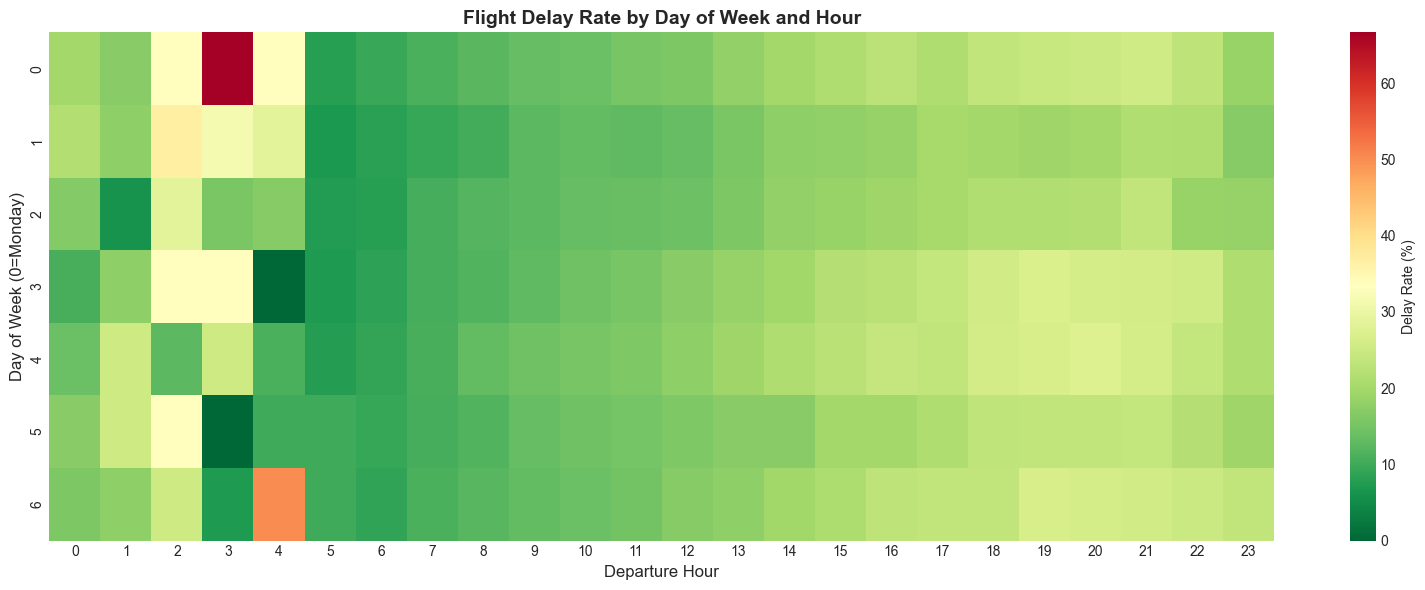

 Saved: viz_05_delay_heatmap.png


In [18]:
print("\n Creating Visualization 5: Delay Heatmap...")

if 'DAY_OF_WEEK' in df.columns and 'DEP_HOUR' in df.columns and 'IS_DELAYED' in df.columns:
    # Calculate delay rate by day and hour
    delay_heatmap = df.groupby(['DAY_OF_WEEK', 'DEP_HOUR'])['IS_DELAYED'].mean().reset_index()
    delay_pivot = delay_heatmap.pivot(index='DAY_OF_WEEK', columns='DEP_HOUR', values='IS_DELAYED')
    
    # Create heatmap
    plt.figure(figsize=(16, 6))
    sns.heatmap(delay_pivot * 100, annot=False, fmt='.1f', cmap='RdYlGn_r',
                cbar_kws={'label': 'Delay Rate (%)'})
    
    plt.xlabel('Departure Hour', fontsize=12)
    plt.ylabel('Day of Week (0=Monday)', fontsize=12)
    plt.title('Flight Delay Rate by Day of Week and Hour', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('viz_05_delay_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: viz_05_delay_heatmap.png")


 Creating Visualization 7: Top Delayed Airports...


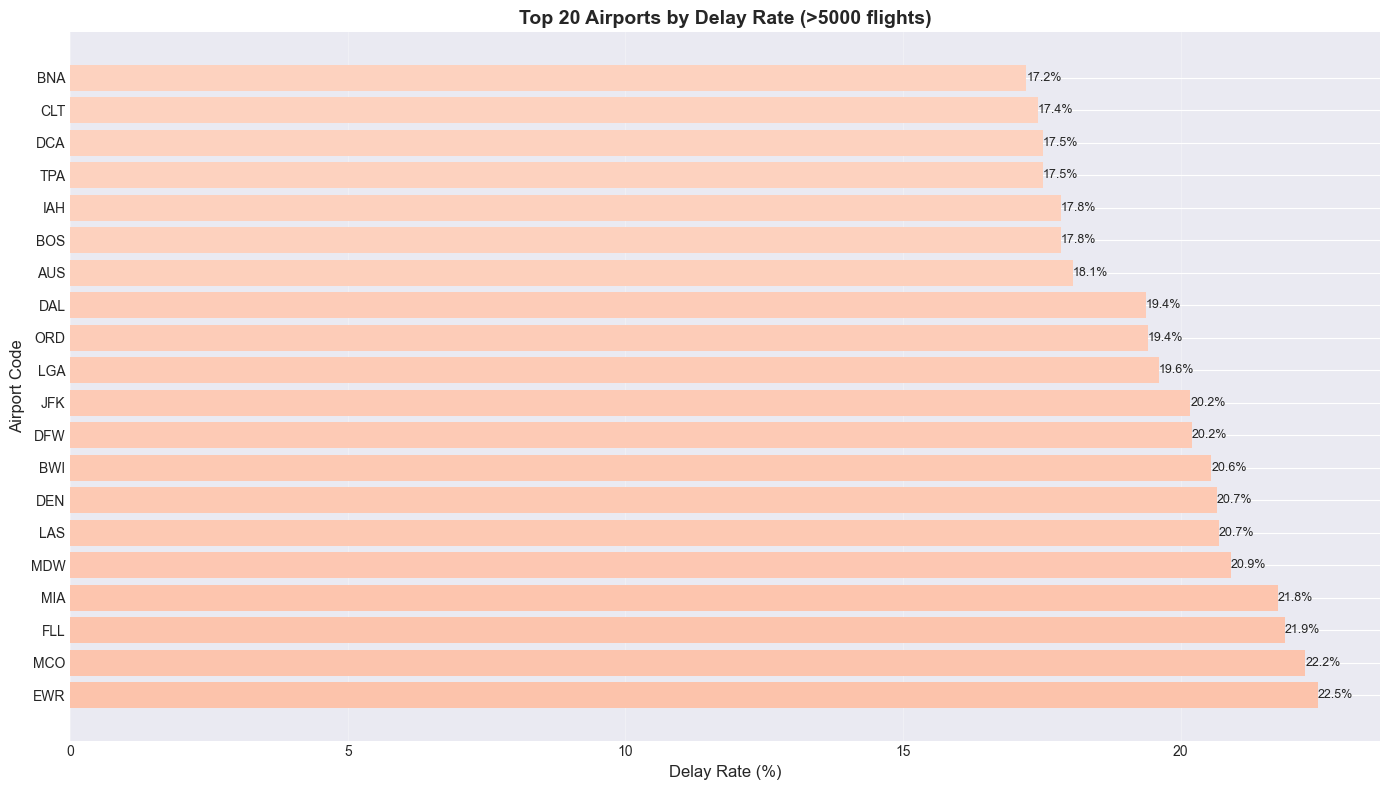

 Saved: viz_07_top_delayed_airports.png


In [19]:
print("\n Creating Visualization 7: Top Delayed Airports...")

if 'ORIGIN' in df.columns and 'IS_DELAYED' in df.columns:
    # Calculate delay rate by origin airport
    airport_delays = df.groupby('ORIGIN').agg({
        'IS_DELAYED': ['mean', 'count']
    }).reset_index()
    airport_delays.columns = ['Airport', 'Delay_Rate', 'Total_Flights']
    
    # Filter airports with at least 5000 flights
    airport_delays = airport_delays[airport_delays['Total_Flights'] >= 5000]
    airport_delays = airport_delays.sort_values('Delay_Rate', ascending=False).head(20)
    
    # Create bar plot
    plt.figure(figsize=(14, 8))
    bars = plt.barh(airport_delays['Airport'], airport_delays['Delay_Rate'] * 100,
                    color=plt.cm.Reds(airport_delays['Delay_Rate']))
    
    plt.xlabel('Delay Rate (%)', fontsize=12)
    plt.ylabel('Airport Code', fontsize=12)
    plt.title('Top 20 Airports by Delay Rate (>5000 flights)', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('viz_07_top_delayed_airports.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: viz_07_top_delayed_airports.png")
